In [5]:
import cv2

# Open the AVI video file (replace 'input_video.avi' with your AVI video file)
video_capture = cv2.VideoCapture('vid.avi')

# Check if the video file opened successfully
if not video_capture.isOpened():
    print("Error: Could not open AVI video file.")
    exit()

# Define the frame number you want to extract
frame_number =  24  # Adjust to the desired frame number

# Set the video's frame position to the desired frame number
video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# Read the frame at the specified frame number
ret, frame = video_capture.read()

# Check if the frame was read successfully
if not ret:
    print(f"Error: Could not read frame {frame_number}. It may not exist in the video.")
    exit()

# Define the rotation angle in degrees (e.g., 45 degrees)
rotation_angle = 5.5  # Adjust to your desired angle

# Get the dimensions of the frame
height, width = frame.shape[:2]

# Calculate the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), rotation_angle, 1)

# Apply the rotation to the frame
rotated_frame = cv2.warpAffine(frame, rotation_matrix, (width, height))

# Save the rotated frame as an image (replace 'output_rotated_frame.png' with your output filename)
output_filename = 'output_rotated_frame.png'
cv2.imwrite(output_filename, rotated_frame)

# Release the video capture object
video_capture.release()

print(f"Frame {frame_number} extracted, rotated by {rotation_angle} degrees, and saved as {output_filename}")


Frame 24 extracted, rotated by 5.5 degrees, and saved as output_rotated_frame.png


Detected Peaks:
Pixel Position: 84, Intensity: 102115
Pixel Position: 352, Intensity: 77424
Pixel Position: 602, Intensity: 81000
Pixel Position: 1004, Intensity: 305981
Pixel Position: 1411, Intensity: 147370
Pixel Position: 1611, Intensity: 99812
6


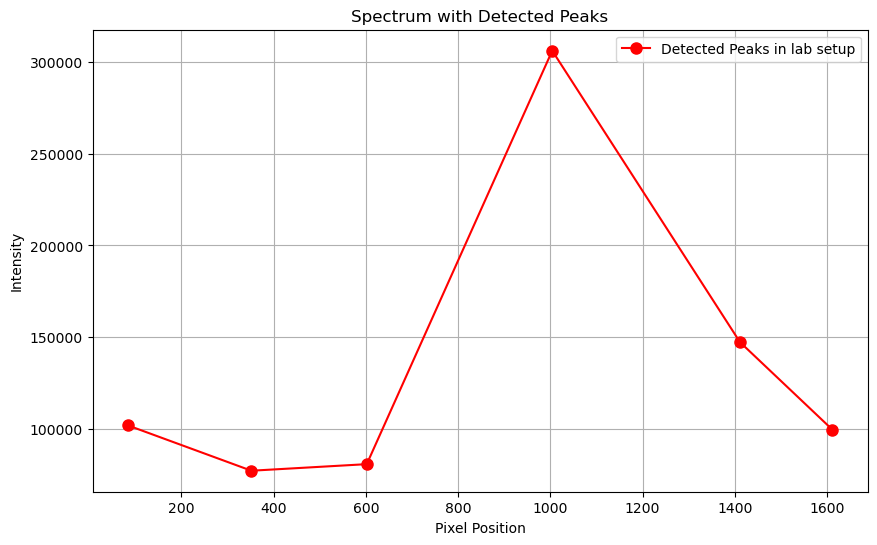

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the BMP image (replace 'spectrum_image.bmp' with your BMP file)
image = cv2.imread('he2 d2.bmp', cv2.IMREAD_GRAYSCALE)

# Process the image column-wise to obtain intensity values
intensity_values = np.sum(image, axis=0)

# Find peaks in the intensity values (adjust parameters as needed)
min_distance = 1  # Minimum pixel distance between peaks
prominence = 10000   # Minimum intensity difference between peak and surrounding area
peaks, _ = find_peaks(intensity_values, distance=min_distance, prominence=prominence)

# Plot the spectrum with detected peaks
plt.figure(figsize=(10, 6))
#plt.imshow(image, cmap='gray', aspect='auto')
plt.plot(peaks, intensity_values[peaks], '-ro', markersize=8, label='Detected Peaks in lab setup')
plt.xlabel('Pixel Position')
plt.ylabel('Intensity')
plt.title('Spectrum with Detected Peaks')
plt.legend()
plt.grid(True)

# Display the pixel positions and corresponding intensity values of the detected peaks
print('Detected Peaks:')
for peak in peaks:
    print(f'Pixel Position: {peak}, Intensity: {intensity_values[peak]}')
print(len(peaks))

# Show the plot
plt.savefig('He2 d2 peaks.png')
plt.show()


Calibration Equation: Wavelength (nm) = -0.000079 * (x)^2 + -0.0381 * x + 711.5019
[-7.87006027e-05 -3.80749635e-02  7.11501856e+02]


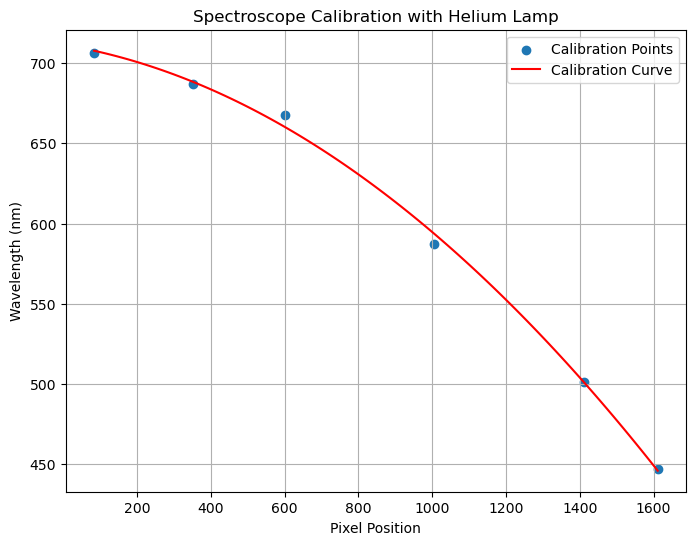

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Known wavelengths of helium lamp spectral lines (in nanometers)
known_wavelengths = [ 706.5, 686.7, 667.8, 587.5, 501.5, 447.1]

# Pixel positions corresponding to the spectral lines (obtained from your CMOS sensor)
pixel_positions = [84, 352, 602, 1004, 1411, 1611]  # Replace with actual pixel positions

# Fit a polynomial to the pixel positions and known wavelengths
calibration_coefficients = np.polyfit(pixel_positions, known_wavelengths, 2)

# Create a calibration function
def calibrate_spectrum(pixel_positions):
    return np.polyval(calibration_coefficients, pixel_positions)

# Plot the calibration curve
plt.figure(figsize=(8, 6))
plt.scatter(pixel_positions, known_wavelengths, label='Calibration Points')
pixel_positions_fit = np.linspace(min(pixel_positions), max(pixel_positions), 100)
wavelengths_fit = calibrate_spectrum(pixel_positions_fit)
plt.plot(pixel_positions_fit, wavelengths_fit, label='Calibration Curve', color='red')
plt.xlabel('Pixel Position')
plt.ylabel('Wavelength (nm)')
plt.title('Spectroscope Calibration with Helium Lamp')
plt.legend()
plt.grid(True)

# Display the calibration equation
print(f'Calibration Equation: Wavelength (nm) = {calibration_coefficients[0]:.6f} * (x)^2 + {calibration_coefficients[1]:.4f} * x + {calibration_coefficients[2]:.4f}')
print(calibration_coefficients)
# Save or show the plot
#plt.savefig('helium_calibration.png')
plt.show()


Custom Calibration Equation: Calibrated Wavelength = sin(w1 - arctan((s/2 - x)/l)) / N


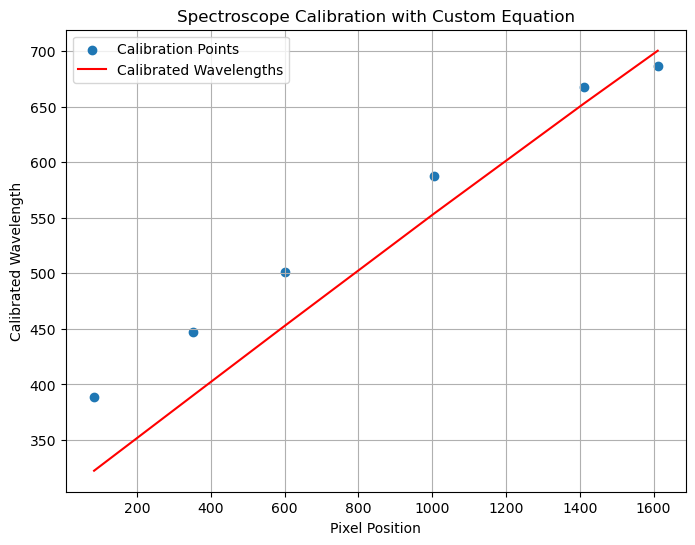

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Known wavelengths of helium lamp spectral lines (in nanometers)
known_wavelengths = [388.8, 447.1, 501.5, 587.5, 667.8, 686.7]

# Pixel positions corresponding to the spectral lines (obtained from your CMOS sensor)
pixel_positions = [84, 352, 602, 1004, 1411, 1611]  # Replace with actual pixel positions

# Define the calibration equation parameters
w_deg = 19  # Adjust as needed
w1 = w_deg * (np.pi / 180.0)
s = 5.44   # Adjust as needed
N = 600  # Adjust as needed
l = 18
# Define the calibration function using the given equation
def calibrate_spectrum_custom(pixel_positions):
    calibrated_wavelengths = []
    for x in pixel_positions:
        x1 = x * s / 1920
        if x1 <= (s/2):
            calibrated_wavelength = (np.sin(w1 - np.arctan(((s/2) - x1)/l)) * (10**(-3)) / N) * (10 ** 9)
            calibrated_wavelengths.append(calibrated_wavelength)
        if x1 > (s/2):
            calibrated_wavelength = (np.sin(w1 + np.arctan(((x1 - (s/2))/l))) * (10**(-3)) / N) * (10 ** 9)
            calibrated_wavelengths.append(calibrated_wavelength)
    
    return calibrated_wavelengths

# Calibrate the known wavelengths using the calibration equation
calibrated_known_wavelengths = calibrate_spectrum_custom(pixel_positions)

# Plot the calibration curve
plt.figure(figsize=(8, 6))
plt.scatter(pixel_positions, known_wavelengths, label='Calibration Points')
plt.plot(pixel_positions, calibrated_known_wavelengths, label='Calibrated Wavelengths', color='red')
plt.xlabel('Pixel Position')
plt.ylabel('Calibrated Wavelength')
plt.title('Spectroscope Calibration with Custom Equation')
plt.legend()
plt.grid(True)

# Display the custom calibration equation
print(f'Custom Calibration Equation: Calibrated Wavelength = sin(w1 - arctan((s/2 - x)/l)) / N')

# Save or show the plot
#plt.savefig('custom_calibration.png')
plt.show()


Detected Peaks:
Pixel Position: 233, Intensity: 17250
Pixel Position: 506, Intensity: 15340
Pixel Position: 760, Intensity: 15758
Pixel Position: 1176, Intensity: 66306
Pixel Position: 1564, Intensity: 30575
Pixel Position: 1756, Intensity: 18988
6


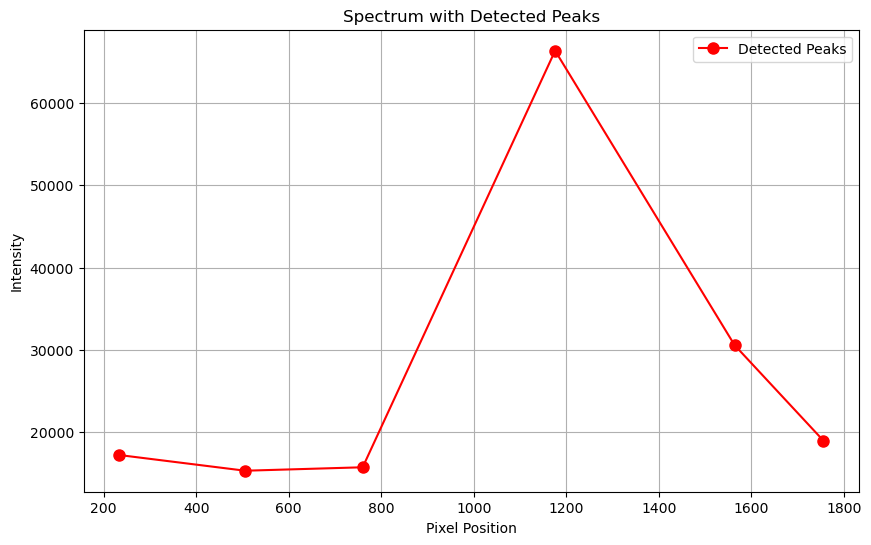

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the PNG image (replace 'spectrum_image.png' with your PNG file)
image = cv2.imread('Capture_00004.png', cv2.IMREAD_GRAYSCALE)

# Process the image column-wise to obtain intensity values
intensity_values = np.sum(image, axis=0)

# Find peaks in the intensity values (adjust parameters as needed)
min_distance = 1  # Minimum pixel distance between peaks
prominence = 5000   # Minimum intensity difference between peak and surrounding area
peaks, _ = find_peaks(intensity_values, distance=min_distance, prominence=prominence)

# Plot the spectrum with detected peaks
plt.figure(figsize=(10, 6))
#plt.imshow(image, cmap='gray', aspect='auto')
plt.plot(peaks, intensity_values[peaks], '-ro', markersize=8, label='Detected Peaks')
plt.xlabel('Pixel Position')
plt.ylabel('Intensity')
plt.title('Spectrum with Detected Peaks')
plt.legend()
plt.grid(True)

# Display the pixel positions and corresponding intensity values of the detected peaks
print('Detected Peaks:')
for peak in peaks:
    print(f'Pixel Position: {peak}, Intensity: {intensity_values[peak]}')
print(len(peaks))

# Show the plot
plt.savefig('He peaks.png')
plt.show()


Calibration Equation: Wavelength (nm) = -0.000022 * (x)^2 + 0.2442 * x + 330.9194
[-2.17865384e-05  2.44175226e-01  3.30919355e+02]


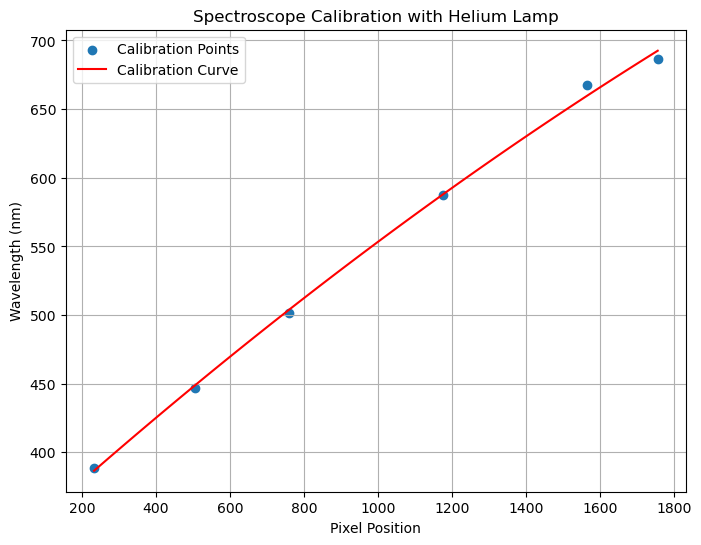

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Known wavelengths of helium lamp spectral lines (in nanometers)
known_wavelengths = [388.8, 447.1, 501.5, 587.5, 667.8, 686.7]

# Pixel positions corresponding to the spectral lines (obtained from your CMOS sensor)
#pixel_positions = [1756, 1564, 1176, 760, 506, 233]  # Replace with actual pixel positions
pixel_positions =[233,506,760,1176,1564,1756]
# Fit a polynomial to the pixel positions and known wavelengths
calibration_coefficients = np.polyfit(pixel_positions, known_wavelengths, 2)

# Create a calibration function
def calibrate_spectrum(pixel_positions):
    return np.polyval(calibration_coefficients, pixel_positions)

# Plot the calibration curve
plt.figure(figsize=(8, 6))
plt.scatter(pixel_positions, known_wavelengths, label='Calibration Points')
pixel_positions_fit = np.linspace(min(pixel_positions), max(pixel_positions), 100)
wavelengths_fit = calibrate_spectrum(pixel_positions_fit)
plt.plot(pixel_positions_fit, wavelengths_fit, label='Calibration Curve', color='red')
plt.xlabel('Pixel Position')
plt.ylabel('Wavelength (nm)')
plt.title('Spectroscope Calibration with Helium Lamp')
plt.legend()
plt.grid(True)

# Display the calibration equation
print(f'Calibration Equation: Wavelength (nm) = {calibration_coefficients[0]:.6f} * (x)^2 + {calibration_coefficients[1]:.4f} * x + {calibration_coefficients[2]:.4f}')
print(calibration_coefficients)
# Save or show the plot
#plt.savefig('helium_calibration.png')
plt.show()


Calibration Equation in lab: Wavelength (nm) = -0.000079 * (x)^2 + -0.0381 * x + 711.5019
Calibration Equation with 8": Wavelength (nm) = -0.000085 * (x)^2 + -0.0013 * x + 711.7470


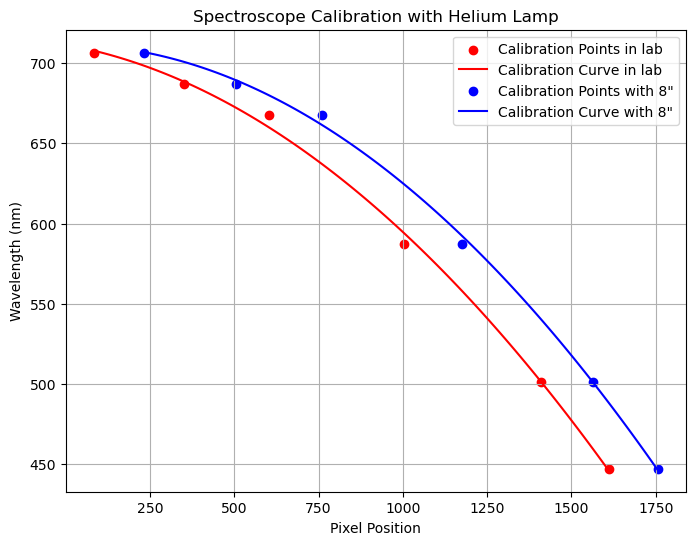

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# Known wavelengths of helium lamp spectral lines (in nanometers)
known_wavelengths1 = [ 706.5, 686.7, 667.8, 587.5, 501.5, 447.1]

# Pixel positions corresponding to the spectral lines (obtained from your CMOS sensor)
pixel_positions1 = [84, 352, 602, 1004, 1411, 1611]  # Replace with actual pixel positions


# Known wavelengths of helium lamp spectral lines (in nanometers)
known_wavelengths2 = [447.1, 501.5, 587.5, 667.8, 686.7, 706.5]

# Pixel positions corresponding to the spectral lines (obtained from your CMOS sensor)
pixel_positions2 = [1756, 1564, 1176, 760, 506, 233]  # Replace with actual pixel positions

# Fit a polynomial to the pixel positions and known wavelengths
cc1 = np.polyfit(pixel_positions1, known_wavelengths1, 2)

cc2 = np.polyfit(pixel_positions2, known_wavelengths2, 2)



# Create a calibration function
def calibrate_spectrum(calibration_coefficients, pixel_positions):
    return np.polyval(calibration_coefficients, pixel_positions)


# Plot the calibration curve
plt.figure(figsize=(8, 6))
plt.scatter(pixel_positions1, known_wavelengths1, label='Calibration Points in lab', color='red')
pixel_positions_fit1 = np.linspace(min(pixel_positions1), max(pixel_positions1), 100)
wavelengths_fit1 = calibrate_spectrum(cc1, pixel_positions_fit1)
plt.plot(pixel_positions_fit1, wavelengths_fit1, label='Calibration Curve in lab', color='red')

#plt.figure(figsize=(8, 6))
plt.scatter(pixel_positions2, known_wavelengths2, label='Calibration Points with 8"', color='blue')
pixel_positions_fit2 = np.linspace(min(pixel_positions2), max(pixel_positions2), 100)
wavelengths_fit2 = calibrate_spectrum(cc2, pixel_positions_fit2)
plt.plot(pixel_positions_fit2, wavelengths_fit2, label='Calibration Curve with 8"', color='blue')

plt.xlabel('Pixel Position')
plt.ylabel('Wavelength (nm)')
plt.title('Spectroscope Calibration with Helium Lamp')
plt.legend()
plt.grid(True)

# Display the calibration equation
print(f'Calibration Equation in lab: Wavelength (nm) = {cc1[0]:.6f} * (x)^2 + {cc1[1]:.4f} * x + {cc1[2]:.4f}')

# Display the calibration equation
print(f'Calibration Equation with 8": Wavelength (nm) = {cc2[0]:.6f} * (x)^2 + {cc2[1]:.4f} * x + {cc2[2]:.4f}')

# Save or show the plot
plt.savefig('helium_calibration.png')
plt.show()


Detected Peaks:
410


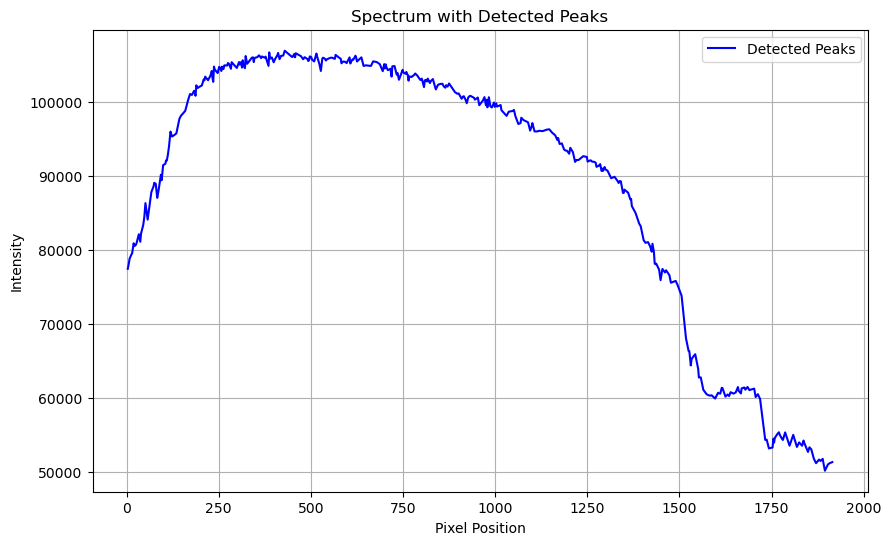

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the PNG image (replace 'spectrum_image.png' with your PNG file)
image = cv2.imread('capella_00002.png', cv2.IMREAD_GRAYSCALE)

# Process the image column-wise to obtain intensity values
intensity_values = np.sum(image, axis=0)
#print(len(intensity_values))
pp = np.linspace(1,1920,1920, endpoint = True)

# Find peaks in the intensity values (adjust parameters as needed)
min_distance = 1  # Minimum pixel distance between peaks
prominence = 1000   # Minimum intensity difference between peak and surrounding area
peaks, _ = find_peaks(-1*intensity_values, distance=min_distance, prominence=prominence)

# Plot the spectrum with detected peaks
plt.figure(figsize=(10, 6))
#plt.imshow(image, cmap='gray', aspect='auto')
plt.plot(peaks, intensity_values[peaks], '-b', markersize=5, label='Detected Peaks')
#plt.plot(pp, intensity_values, '-r', markersize=5, label='Detected Peaks')

plt.xlabel('Pixel Position')
plt.ylabel('Intensity')
plt.title('Spectrum with Detected Peaks')
plt.legend()
plt.grid(True)

# Display the pixel positions and corresponding intensity values of the detected peaks
print('Detected Peaks:')
#for peak in peaks:
    #print(f'Pixel Position: {peak}, Intensity: {intensity_values[peak]}')
print(len(peaks))

# Show the plot
plt.show()


Detected Peaks:
243


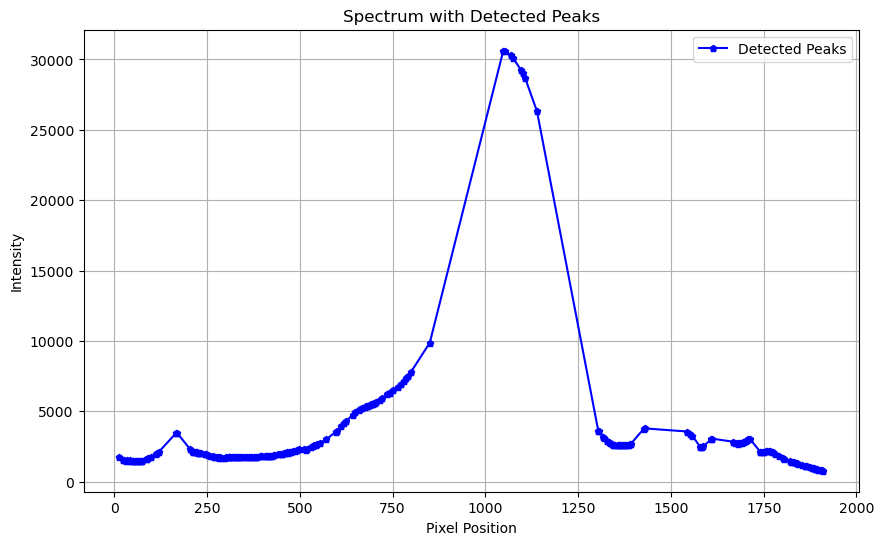

In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the PNG image (replace 'spectrum_image.png' with your PNG file)
image = cv2.imread('output_rotated_frame.png', cv2.IMREAD_GRAYSCALE)

# Process the image column-wise to obtain intensity values
intensity_values = np.sum(image, axis=0)
#print(len(intensity_values))
pp = np.linspace(1,1920,1920, endpoint = True)

# Find peaks in the intensity values (adjust parameters as needed)
min_distance = 1  # Minimum pixel distance between peaks
prominence = 1   # Minimum intensity difference between peak and surrounding area
peaks, _ = find_peaks(-1*intensity_values, distance=min_distance, prominence=prominence)

# Plot the spectrum with detected peaks
plt.figure(figsize=(10, 6))
#plt.imshow(image, cmap='gray', aspect='auto')
plt.plot(peaks, intensity_values[peaks], '-bp', markersize=5, label='Detected Peaks')
#plt.plot(pp, intensity_values, '-r', markersize=5, label='Detected Peaks')

plt.xlabel('Pixel Position')
plt.ylabel('Intensity')
plt.title('Spectrum with Detected Peaks')
plt.legend()
plt.grid(True)

# Display the pixel positions and corresponding intensity values of the detected peaks
print('Detected Peaks:')
#for peak in peaks:
    #print(f'Pixel Position: {peak}, Intensity: {intensity_values[peak]}')
print(len(peaks))

# Show the plot
plt.show()


Detected peaks (Absorption Features):
Pixel Position: 233, Wavelength: 706.8135405797163 nm, Width: 17.217507736070843 pixels
Pixel Position: 506, Wavelength: 689.2453861075935 nm, Width: 17.623913641601405 pixels
Pixel Position: 760, Wavelength: 661.47745481136 nm, Width: 18.808582945889725 pixels
Pixel Position: 1176, Wavelength: 592.2153289469376 nm, Width: 32.420942474701405 pixels
Pixel Position: 1564, Wavelength: 500.9953604011296 nm, Width: 22.539593206391828 pixels
Pixel Position: 1756, Wavelength: 446.35292907159356 nm, Width: 23.566072785611595 pixels


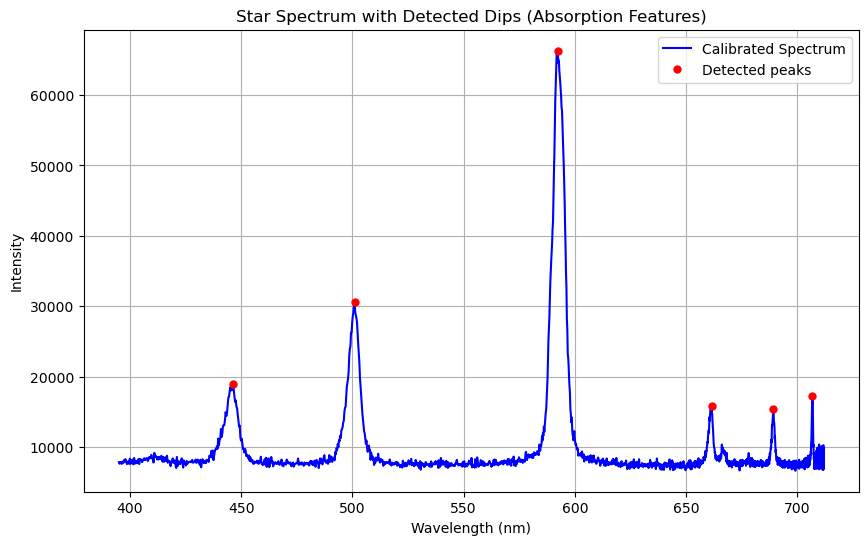

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.signal import find_peaks, peak_widths

## Load the PNG image (replace 'spectrum_image.png' with your PNG file)
image = cv2.imread('Capture_00004.png', cv2.IMREAD_GRAYSCALE)

# Process the image column-wise to obtain pixel intensity values
intensity_values = np.sum(image, axis=0)

# Define your calibration coefficients (replace with your actual coefficients)
calibration_coefficients = [-8.53327324e-05, -1.29132494e-03,  7.11747048e+02]  # Adjust with your specific coefficients
#calibration_coefficients = [  0.46721306, 385.23244473]
# Use your calibration equation to convert pixel positions into wavelengths
def calibrate_spectrum(pixel_positions):
    return np.polyval(calibration_coefficients, pixel_positions)

# Calibrate the star's spectrum using the calibration equation
calibrated_wavelengths = calibrate_spectrum(range(len(intensity_values)))

# Find dips (absorption features) in the calibrated spectrum
min_distance = 1 #Adjust as needed
prominence = 5000  # Adjust as needed
dips, _ = find_peaks(intensity_values, distance=min_distance, prominence=prominence)

# Calculate dip widths
dip_widths, _, _, _ = peak_widths(intensity_values, dips)

# Create a dictionary to store wavelength values for the detected dips
dips_wavelengths = {pixel_position: calibrated_wavelengths[pixel_position] for pixel_position in dips}

# Plot the calibrated spectrum with detected dips
plt.figure(figsize=(10, 6))
plt.plot(calibrated_wavelengths, intensity_values, color='blue', label='Calibrated Spectrum')
plt.plot([calibrated_wavelengths[pixel_position] for pixel_position in dips], [intensity_values[pixel_position] for pixel_position in dips], 'ro', markersize=5, label='Detected peaks')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title('Star Spectrum with Detected Dips (Absorption Features)')
plt.legend()
plt.grid(True)

# Display the detected dips with their corresponding wavelengths and widths
print('Detected peaks (Absorption Features):')
for pixel_position, wavelength in dips_wavelengths.items():
    width = dip_widths[dips.tolist().index(pixel_position)]
    print(f'Pixel Position: {pixel_position}, Wavelength: {wavelength} nm, Width: {width} pixels')


    
#[447.1, 501.5, 587.5, 667.8, 686.7, 706.5]

Detected peaks (Absorption Features):
Pixel Position: 652, Wavelength: 674.6298182649504 nm, Width: 47.87562153858596 pixels
Pixel Position: 1186, Wavelength: 590.1868565582496 nm, Width: 30.258956432932337 pixels
Pixel Position: 1627, Wavelength: 483.75931173734034 nm, Width: 10.936738936738948 pixels
Pixel Position: 1655, Wavelength: 475.88141786239 nm, Width: 58.33481916625374 pixels


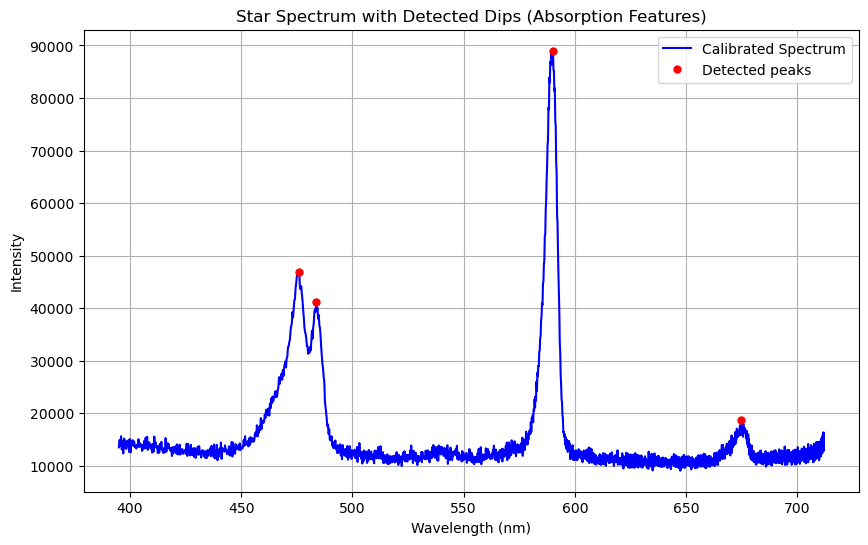

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.signal import find_peaks, peak_widths

## Load the PNG image (replace 'spectrum_image.png' with your PNG file)
image = cv2.imread('hg 8 inch_00037.png', cv2.IMREAD_GRAYSCALE)

# Process the image column-wise to obtain pixel intensity values
intensity_values = np.sum(image, axis=0)

# Define your calibration coefficients (replace with your actual coefficients)
calibration_coefficients = [-8.53327324e-05, -1.29132494e-03,  7.11747048e+02]  # Adjust with your specific coefficients
#calibration_coefficients = [  0.46721306, 385.23244473]
# Use your calibration equation to convert pixel positions into wavelengths
def calibrate_spectrum(pixel_positions):
    return np.polyval(calibration_coefficients, pixel_positions)

# Calibrate the star's spectrum using the calibration equation
calibrated_wavelengths = calibrate_spectrum(range(len(intensity_values)))

# Find dips (absorption features) in the calibrated spectrum
min_distance = 1 #Adjust as needed
prominence = 5000  # Adjust as needed
dips, _ = find_peaks(intensity_values, distance=min_distance, prominence=prominence)

# Calculate dip widths
dip_widths, _, _, _ = peak_widths(intensity_values, dips)

# Create a dictionary to store wavelength values for the detected dips
dips_wavelengths = {pixel_position: calibrated_wavelengths[pixel_position] for pixel_position in dips}

# Plot the calibrated spectrum with detected dips
plt.figure(figsize=(10, 6))
plt.plot(calibrated_wavelengths, intensity_values, color='blue', label='Calibrated Spectrum')
plt.plot([calibrated_wavelengths[pixel_position] for pixel_position in dips], [intensity_values[pixel_position] for pixel_position in dips], 'ro', markersize=5, label='Detected peaks')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title('Star Spectrum with Detected Dips (Absorption Features)')
plt.legend()
plt.grid(True)

# Display the detected dips with their corresponding wavelengths and widths
print('Detected peaks (Absorption Features):')
for pixel_position, wavelength in dips_wavelengths.items():
    width = dip_widths[dips.tolist().index(pixel_position)]
    print(f'Pixel Position: {pixel_position}, Wavelength: {wavelength} nm, Width: {width} pixels')


    
#[447.1, 501.5, 587.5, 667.8, 686.7, 706.5]

Detected Peaks:
Pixel Position: 320, Intensity: 66975
Pixel Position: 542, Intensity: 69965
Pixel Position: 812, Intensity: 117262
Pixel Position: 1136, Intensity: 81637
4


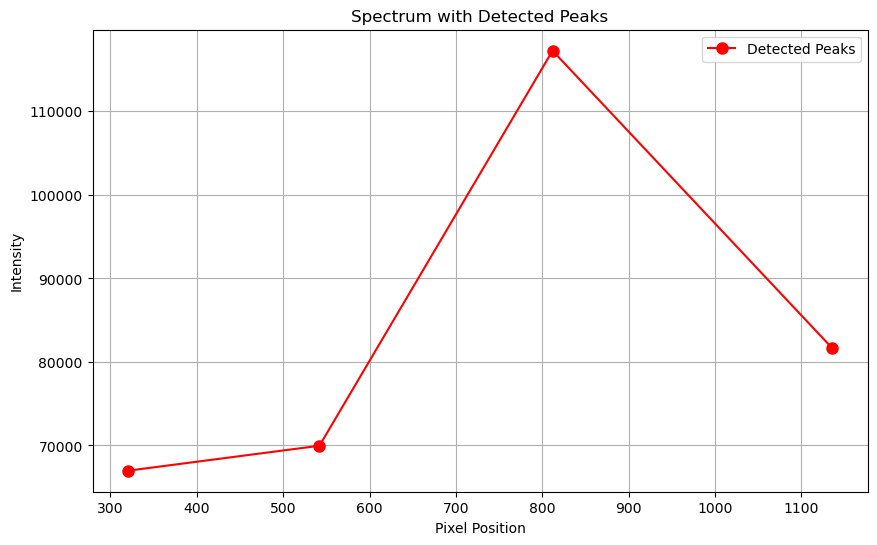

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the PNG image (replace 'spectrum_image.png' with your PNG file)
image = cv2.imread('Capture_00007.png', cv2.IMREAD_GRAYSCALE)

# Process the image column-wise to obtain intensity values
intensity_values = np.sum(image, axis=0)

# Find peaks in the intensity values (adjust parameters as needed)
min_distance = 1  # Minimum pixel distance between peaks
prominence = 7000   # Minimum intensity difference between peak and surrounding area
peaks, _ = find_peaks(intensity_values, distance=min_distance, prominence=prominence)

# Plot the spectrum with detected peaks
plt.figure(figsize=(10, 6))
#plt.imshow(image, cmap='gray', aspect='auto')
plt.plot(peaks, intensity_values[peaks], '-ro', markersize=8, label='Detected Peaks')
plt.xlabel('Pixel Position')
plt.ylabel('Intensity')
plt.title('Spectrum with Detected Peaks')
plt.legend()
plt.grid(True)

# Display the pixel positions and corresponding intensity values of the detected peaks
print('Detected Peaks:')
for peak in peaks:
    print(f'Pixel Position: {peak}, Intensity: {intensity_values[peak]}')
print(len(peaks))

#Show the plot
#plt.savefig('He peaks 11'.png')
plt.show()


Calibration Equation: Wavelength (nm) = 0.000045 * (x)^2 + 0.2307 * x + 367.0747
[4.52842158e-05 2.30699088e-01 3.67074653e+02]


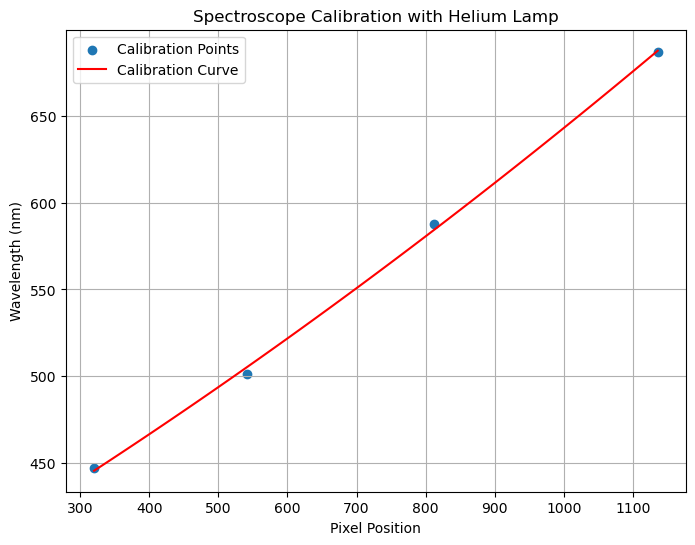

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Known wavelengths of helium lamp spectral lines (in nanometers)
known_wavelengths = [686.7, 587.5, 501.5, 447.1]

# Pixel positions corresponding to the spectral lines (obtained from your CMOS sensor)
pixel_positions = [1136, 812, 542, 320]  # Replace with actual pixel positions

# Fit a polynomial to the pixel positions and known wavelengths
calibration_coefficients = np.polyfit(pixel_positions, known_wavelengths, 2)

# Create a calibration function
def calibrate_spectrum(pixel_positions):
    return np.polyval(calibration_coefficients, pixel_positions)

# Plot the calibration curve
plt.figure(figsize=(8, 6))
plt.scatter(pixel_positions, known_wavelengths, label='Calibration Points')
pixel_positions_fit = np.linspace(min(pixel_positions), max(pixel_positions), 100)
wavelengths_fit = calibrate_spectrum(pixel_positions_fit)
plt.plot(pixel_positions_fit, wavelengths_fit, label='Calibration Curve', color='red')
plt.xlabel('Pixel Position')
plt.ylabel('Wavelength (nm)')
plt.title('Spectroscope Calibration with Helium Lamp')
plt.legend()
plt.grid(True)

# Display the calibration equation
print(f'Calibration Equation: Wavelength (nm) = {calibration_coefficients[0]:.6f} * (x)^2 + {calibration_coefficients[1]:.4f} * x + {calibration_coefficients[2]:.4f}')
print(calibration_coefficients)
# Save or show the plot
#plt.savefig('helium_calibration.png')
plt.show()
